In [2]:
%matplotlib inline
import pandas as pd

In [100]:
from IPython.core.display import HTML
css = "" + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,Entre hermanos,1984
1,Warning: Apocalypse 2012,2012
2,One Dark Night,1939
3,Jungle Siren,1942
4,Shreelancer,2017


In [5]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

In [27]:
titles['decade'] = titles.year // 10 * 10

In [28]:
titles.head()

,title,year,decade
0,Entre hermanos,1984,1980
1,Warning: Apocalypse 2012,2012,2010
2,One Dark Night,1939,1930
3,Jungle Siren,1942,1940
4,Shreelancer,2017,2010


<Axes: xlabel='decade'>

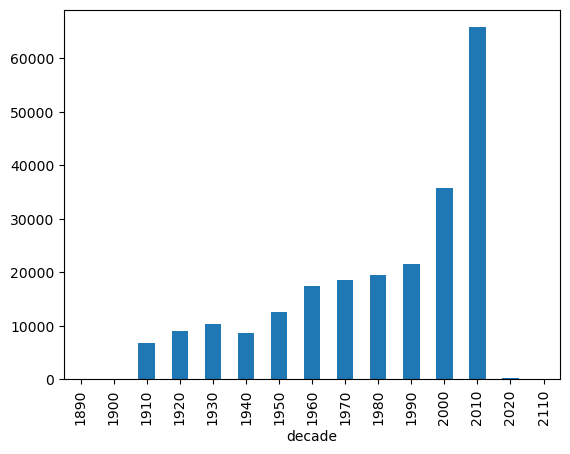

In [29]:
titles.groupby('decade')['title'].count().sort_index().plot(kind='bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

<Axes: xlabel='decade'>

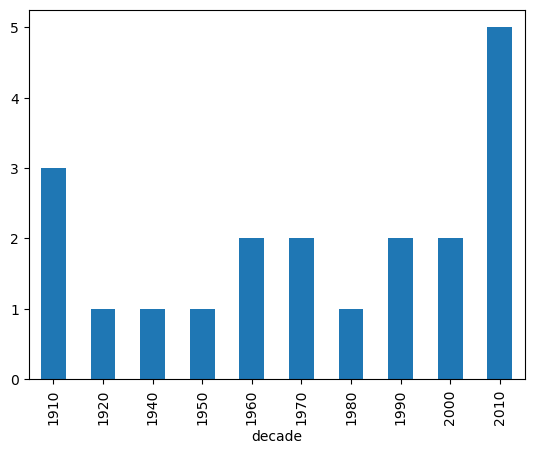

In [44]:
ham_films = titles[ titles['title'] == 'Hamlet' ]
ham_films.groupby('decade')['title'].count().sort_index().plot(kind='bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

<Axes: xlabel='year'>

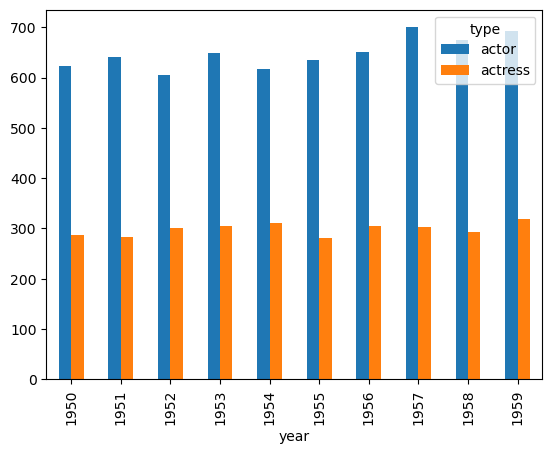

In [78]:
films_1950s = cast[ (cast.n == 1) & (cast.year >= 1950) & (cast.year < 1960) ]
films_1950s_df = films_1950s.groupby(['year', 'type'])
films_1950s_df['name'].count().unstack().plot(kind='bar')

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [95]:
films_1950s_n1_n5 = cast[ (cast.n >= 1) & (cast.n <=5) & (cast.year >= 1950) & (cast.year < 1960) ]
films_1950s_n1_n5_typed = films_1950s_n1_n5.groupby(['n', 'type'])
films_1950s_n1_n5_typed['name'].count().unstack()

type,actor,actress
n,,
1.0,6482,2985
2.0,4520,4496
3.0,5489,3109
4.0,5479,2820
5.0,5493,2531


### Use groupby() to determine how many roles are listed for each movie named _The Pink Panther_.

In [99]:
cast[cast['title'] == "The Pink Panther"].groupby('year').count()['character'].reset_index()

,year,character
0,1963,21
1,2006,90


### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [127]:
frank_oz_films = cast[cast['name'] == 'Frank Oz'].groupby(['title', 'year']).count()
frank_oz_films[ frank_oz_films['n'] > 1 ]['n'].reset_index().sort_values('year')

,title,year,n
7,The Muppet Movie,1979,8
5,The Great Muppet Caper,1981,6
4,The Dark Crystal,1982,2
8,The Muppets Take Manhattan,1984,7
0,Follow That Bird,1985,3
6,The Muppet Christmas Carol,1992,7
1,Muppet Treasure Island,1996,4
2,Muppets from Space,1999,4
3,The Adventures of Elmo in Grouchland,1999,3


### List each of the characters that Frank Oz has portrayed at least twice.

In [149]:
# frank_oz_films = cast[cast['name'] == 'Frank Oz']
frank_oz_films = cast[cast['name'] == 'Frank Oz'].groupby('character').size()
frank_oz_films[frank_oz_films > 1].reset_index()
# frank_oz_films[ frank_oz_films['title'] >= 2 ]['title'].reset_index()

,character,0
0,Animal,6
1,Bert,3
2,Cookie Monster,5
3,Fozzie Bear,4
4,Grover,2
5,Miss Piggy,5
6,Sam the Eagle,5
7,Yoda,6
